# ESTIMATION of COVID-19 Pandemic

## Loading Data
#### Kami menggunakan data infected indifidual COVID-19 yang di sediakan oleh [Johns Hopkins University](https://jhu.edu/). Dataset tersedia di [this GitHub Repository](https://github.com/CSSEGISandData/COVID-19)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)  # untuk setting ukuran grafik

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [3]:
infected = pd.read_csv(infected_dataset_url)
infected

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178901,178901,178901,178905,178919,178922,178981,179010,179017,179131
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275177,275191,275211,275266,275310,275341,275366,275372,275416,275440
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265782,265782,265782,265786,265791,265794,265798,265800,265804,265806
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41349,41349,41717,41717,41717,41717,41717,41717,41717,41717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,657060,657060,657060,657060,657060,657060,657060,657193,657193,657193
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11819,11819,11819,11819,11819,11819,11819,11819,11819,11819
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,319755,319755,319755,319755,319755,320099,320099,320157,320226,320303


In [4]:
recovered = pd.read_csv(recovered_dataset_url)
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
deaths = pd.read_csv(deaths_dataset_url)
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7683,7683,7683,7684,7684,7684,7684,7685,7685,7686
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3497,3497,3497,3497
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5657,5657,5657,5657,5657,5657,5657,5657,5657,5657
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3976,3976,3976,3976,3976,3982,3982,3982,3983,3983


## Explore of Data

In [10]:
infected['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    14
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 198, dtype: int64

In [12]:
infected[infected['Country/Region']=='Indonesia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
149,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,6047208,6047315,6047491,6047741,6047986,6048204,6048431,6048685,6048685,6048685


In [13]:
recovered[recovered['Country/Region']=='Indonesia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
134,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
deaths[deaths['Country/Region']=='Indonesia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
149,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,156287,156305,156321,156340,156357,156371,156381,156396,156396,156396


In [20]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,178901,178901,178901,178905,178919,178922,178981,179010,179017,179131
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,275177,275191,275211,275266,275310,275341,275366,275372,275416,275440
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,265782,265782,265782,265786,265791,265794,265798,265800,265804,265806
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,41349,41349,41717,41717,41717,41717,41717,41717,41717,41717
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


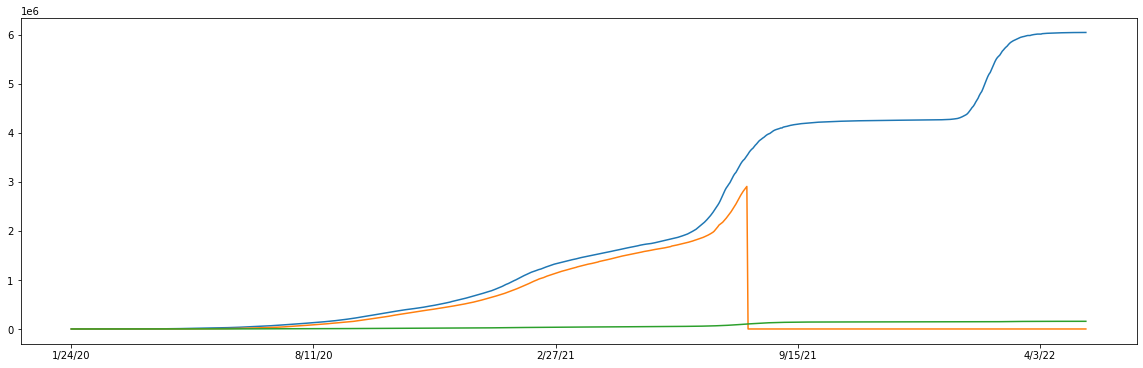

In [35]:
infected.loc['Indonesia'][2:].plot()
recovered.loc['Indonesia'][2:].plot()
deaths.loc['Indonesia'][2:].plot()
plt.show()

In [26]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Investigating the Data

In [27]:
def mkframe(Country):
    df = pd.DataFrame({ 'infected' : infected.loc[Country] ,
                        'recovered' : recovered.loc[Country],
                        'deaths' : deaths.loc[Country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('Indonesia')
df

,infected,recovered,deaths
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2022-05-07,6048204,0,156371
2022-05-08,6048431,0,156381
2022-05-09,6048685,0,156396
2022-05-10,6048685,0,156396


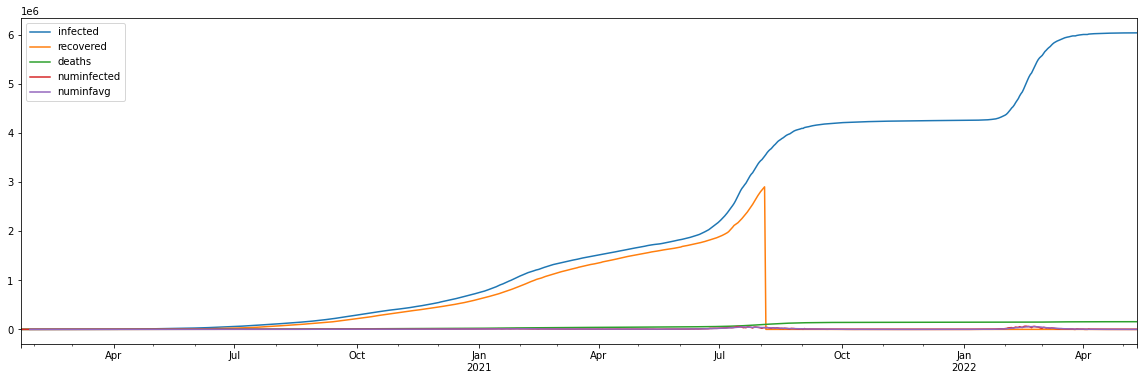

In [36]:
df.plot()
plt.show()

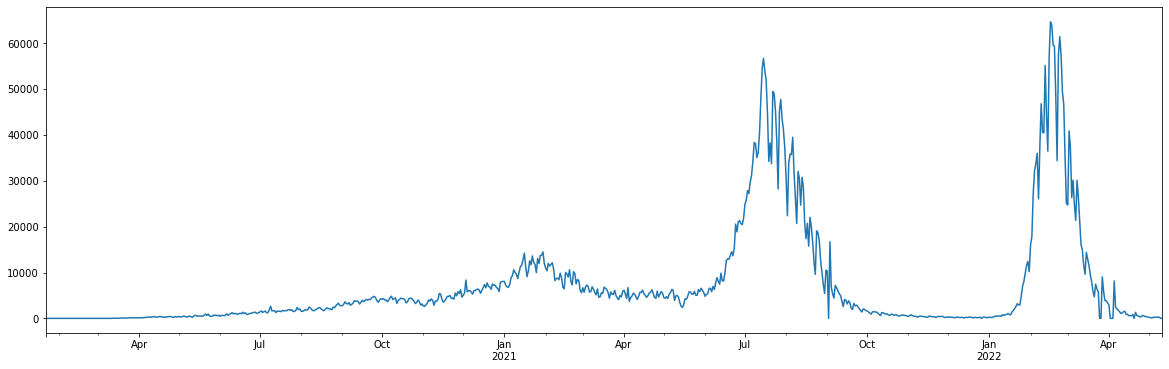

In [37]:
df['numinfected'] = df['infected'].diff()
df['numinfected'].plot()
plt.show()

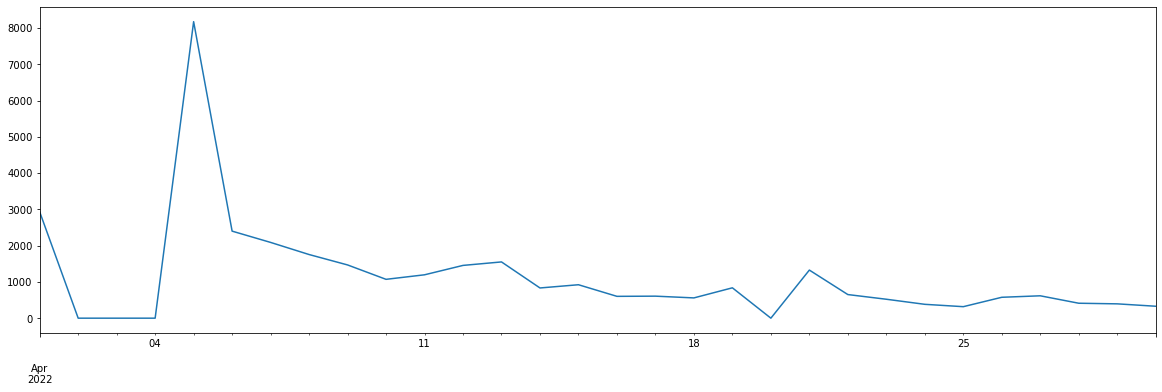

In [38]:
### Mari kita amati data lebih teliti untuk pengamatan disatu bulan terakhir

df[(df.index.year==2022) & (df.index.month==4)]['numinfected'].plot()
plt.show()

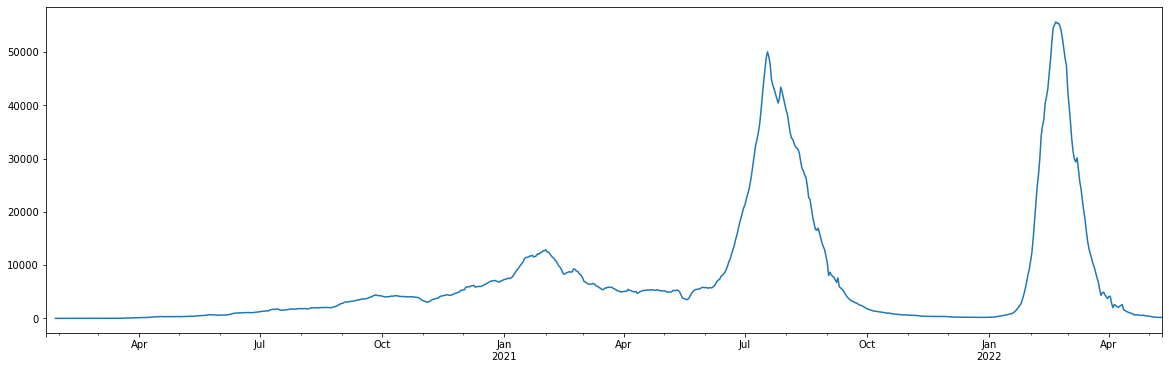

In [39]:
### Karena kita ingin mengamati tren maka kita akan perhalus kurva dengan menghitung rata rata laju perbedaan nilai penanganan harian
df['numinfavg'] = df['numinfected'].rolling(window=7).mean()
df['numinfavg'].plot()
plt.show()

In [40]:
#### Agar dapatkan gambaran perbandingan beberapa negara terkait populasinya masing masing negara maka kita load dataset negara :

countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4312,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4313,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4314,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4315,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [41]:
countries[(countries['Country_Region']=='Indonesia')& countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
236,360,ID,IDN,360.0,NaN,NaN,NaN,Indonesia,-0.7893,113.9213,Indonesia,273523621.0


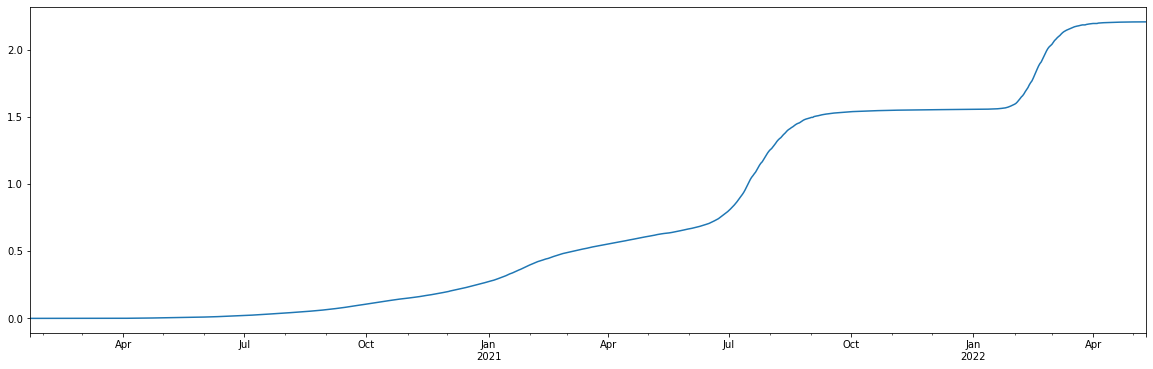

In [42]:
pop = countries[(countries['Country_Region']=='Indonesia') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(20,6))
plt.show()

Untuk melihat seberapa menular penyakit itu, kita melihat bilangan reproduksi dasar  𝑅0 , yang menunjukkan jumlah orang yang akan terinfeksi lebih lanjut oleh orang yang terinfeksi. Kapan 𝑅0 lebih dari 1, epidemi cenderung menyebar.

𝑅0 adalah sifat dari penyakit itu sendiri, dan tidak memperhitungkan beberapa tindakan perlindungan yang mungkin dilakukan orang untuk memperlambat pandemi. Selama perkembangan pandemi, kita dapat memperkirakan jumlah reproduksi 𝑅𝑡 pada waktu tertentu 𝑡 . Telah ditunjukkan bahwa jumlah ini dapat diperkirakan secara kasar dengan mengambil jendela 8 hari, dan menghitung
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
 
di mana 𝐼𝑡 adalah jumlah individu yang baru terinfeksi pada hari 𝑡 .

Mari kita menghitung 𝑅𝑡 untuk data pandemi kami. Untuk melakukan ini, kami akan mengambil jendela bergulir dari 8 ninfectednilai, dan menerapkan fungsi untuk menghitung rasio di atas:

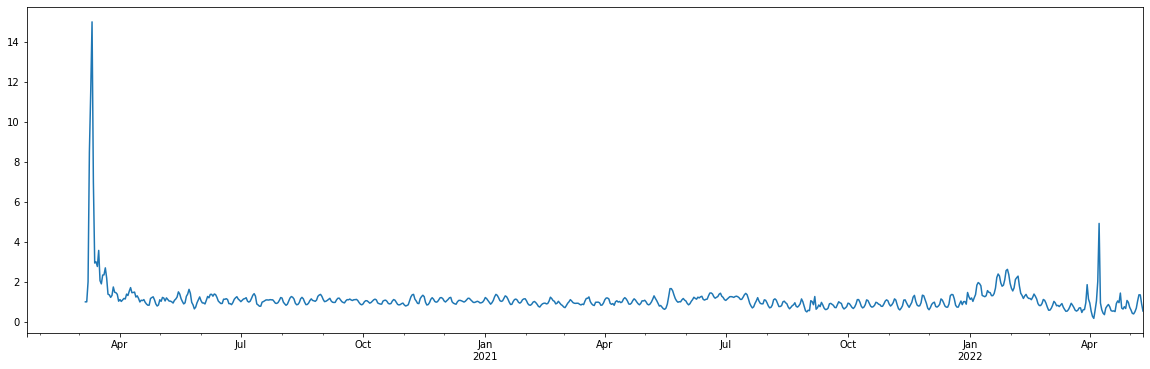

In [43]:
df['Rt'] = df['numinfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

Mari kita lihat lebih jauh awal dari pandemi. Kami juga akan membatasi nilai sumbu y untuk hanya menampilkan nilai di bawah 6, agar dapat melihat lebih baik, dan menggambar garis horizontal pada 1.

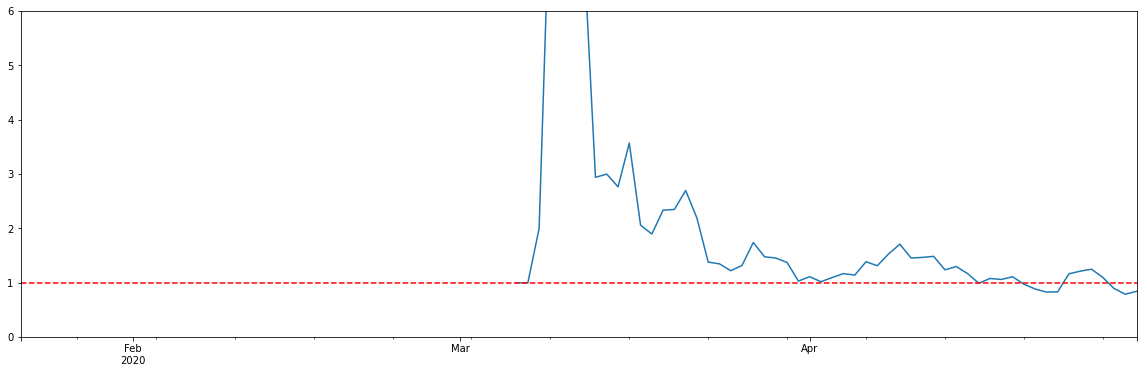

In [48]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(20,6))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

Indikator lain yang menarik dari pandemi adalah turunan , atau perbedaan harian dalam kasus baru. Hal ini memungkinkan kita untuk melihat dengan jelas ketika pandemi meningkat atau menurun.

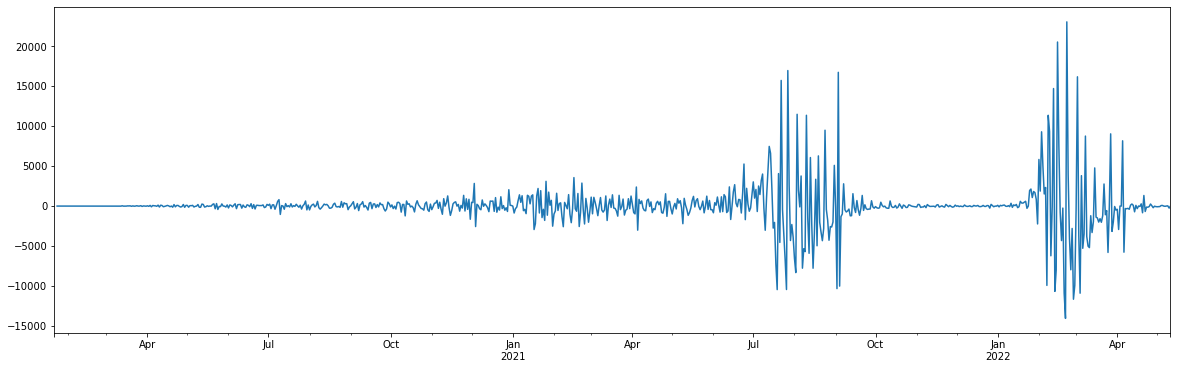

In [49]:
df['numinfected'].diff().plot()
plt.show()

Mengingat fakta bahwa ada banyak fluktuasi data yang disebabkan oleh pelaporan, masuk akal untuk menghaluskan kurva dengan menjalankan rata-rata bergulir untuk mendapatkan gambaran keseluruhan. Mari kita kembali fokus pada bulan-bulan pertama pandemi:

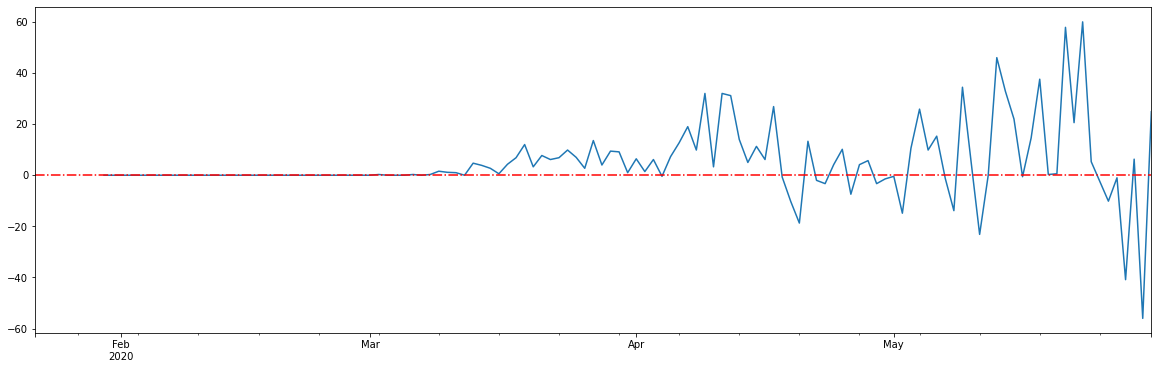

In [51]:
ax=df[df.index<"2020-06-01"]['numinfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()